# TP 01: ESTIMATEURS DU MAXIMUM DE VRAISEMBLANCE 

### Lecture des données

In [5]:
d <- read.csv2('fiabilites.csv', header = F, dec = ',', sep = ';')

#### Q1 : Simulation d'un echantillon d'une loi discrete.

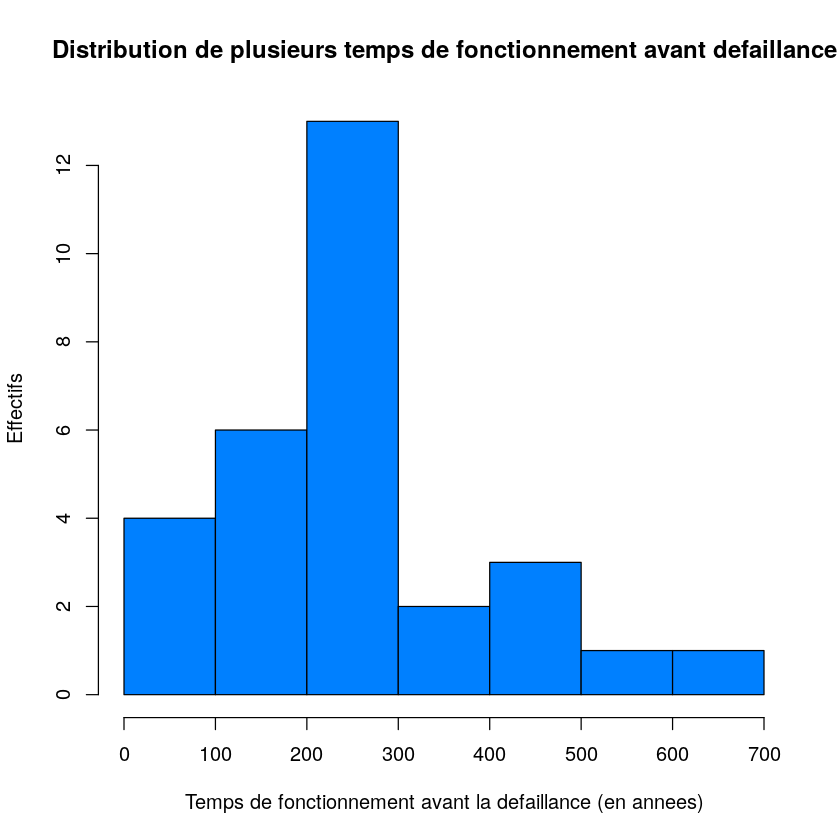

In [8]:
echantillon_30 <- sample(d$V1, 30)
hist(echantillon_30,
     main="Distribution de plusieurs temps de fonctionnement avant defaillance",
     xlab="Temps de fonctionnement avant la defaillance (en annees)",
     ylab="Effectifs",
     col="#0080FF")

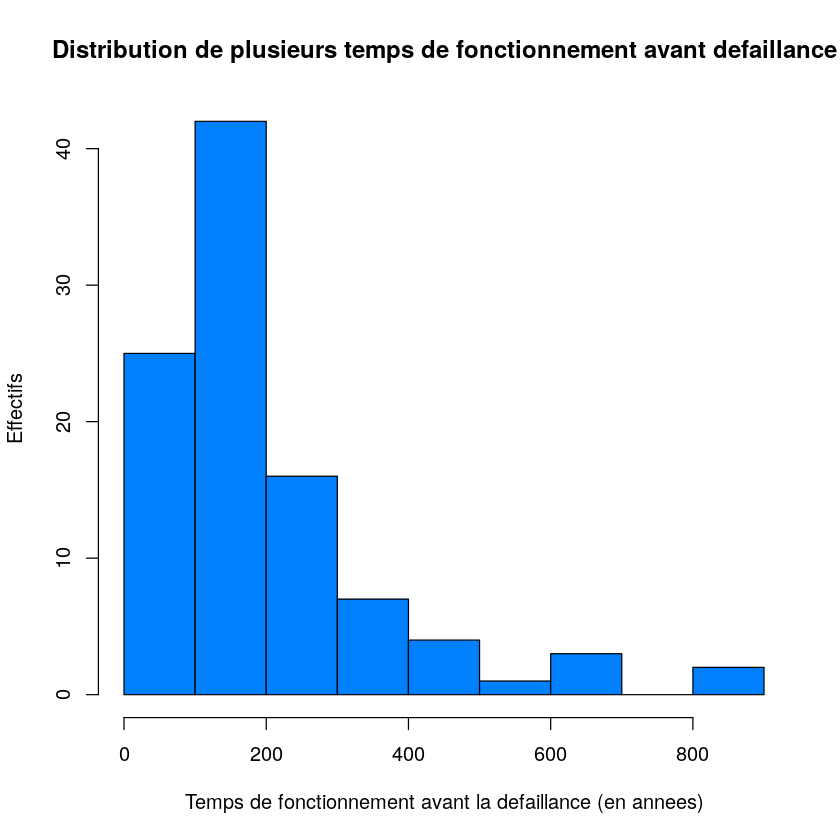

In [10]:
echantillon_100 <- sample(d$V1, 100)
hist(echantillon_100,
     main="Distribution de plusieurs temps de fonctionnement avant defaillance",
     xlab="Temps de fonctionnement avant la defaillance (en annees)",
     ylab="Effectifs",
     col="#0080FF")

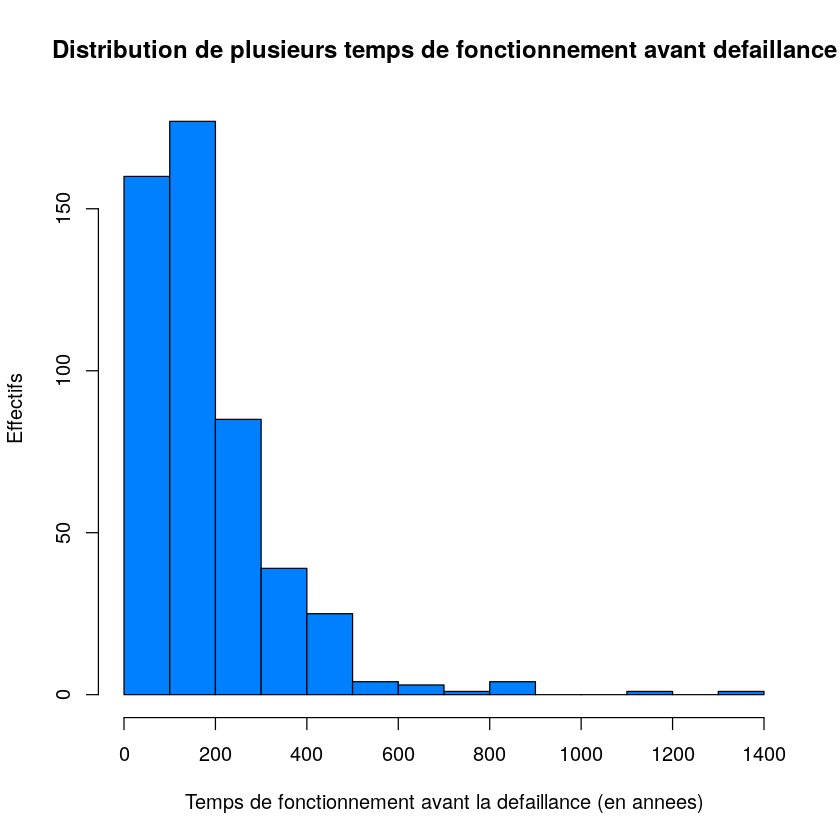

In [11]:
echantillon_500 <- sample(d$V1, 500)
hist(echantillon_500,
     main="Distribution de plusieurs temps de fonctionnement avant defaillance",
     xlab="Temps de fonctionnement avant la defaillance (en annees)",
     ylab="Effectifs",
     col="#0080FF")

#### Q2 : Log vraisemblance

Methode 1 : ecrire directement l'expression de la densite trouvee en cours
 
N.B : R sait resoudre un probleme de minimisation mais pas de maximisation
 - On ecrit donc l'oppose de la fonction log-vraisemblance qu'on minimisera
 - avec R par la suite (ce qui revient Ã  maximiser la log-vraisemblance !)

In [14]:
LogVraisemblance_1 <- function(parametres, echantillon){
  mu <- parametres[1]
  sigma <- parametres[2]
  n <- length(echantillon)
  logv <- -(n/2)*log(2*pi*(sigma^2)) - sum(log(echantillon)) - (1/(2*sigma^2))*sum((log(echantillon)-mu)^2)
  return(-logv)
}

Methode 2: utiliser directement la fontion de densite predefinie sous R

N.B: `log=TRUE` alors le log de la fonction de densite est retourne

N.B: R sait resoudre un probleme de minimisation mais pas de maximisation
 - On ecrit donc l'oppose de la fonction log-vraisemblance qu'on minimisera
 - Avec R par la suite (ce qui revient a maximiser la log-vraisemblance !

In [16]:
LogVraisemblance_2 <- function(parametres, echantillon){
  mu<-parametres[1]
  sigma<-parametres[2]
  return(-sum(dlnorm(echantillon, meanlog = mu, sdlog = sigma, log = T))) # signe negatif car fonction d'optimisation minimise
}

#### Q3 : Optimisation

La fonction `optim` prend en arguments :
 - Un vecteur avec les valeurs initiales des parametres a optimiser (`mu` et `sigma`)
 - le nom de la fonction a optimiser
 - les parametres fixes de la fonction a optimiser ( `echantillon` ici)

###### Methode 1

In [18]:
(optim_30  <- optim(c(1,1), LogVraisemblance, echantillon=echantillon_30))
(optim_100 <- optim(c(1,1), LogVraisemblance, echantillon=echantillon_100))
(optim_500 <- optim(c(1,1), LogVraisemblance, echantillon=echantillon_500))

$par
[1] 5.3462558 0.6146813

$value
[1] 188.3662

$counts
function gradient 
      83       NA 

$convergence
[1] 0

$message
NULL

$par
[1] 5.0410471 0.7248108

$value
[1] 613.8227

$counts
function gradient 
      79       NA 

$convergence
[1] 0

$message
NULL

$par
[1] 4.9608683 0.7053563

$value
[1] 3015.395

$counts
function gradient 
      85       NA 

$convergence
[1] 0

$message
NULL

###### Methode 2 

In [17]:
(optim_2_30  <- optim(c(1,1), LogVraisemblance_2, echantillon=echantillon_30,method="L-BFGS-B",lower = c(0.1,0.2)))
(optim_2_100 <- optim(c(1,1), LogVraisemblance_2, echantillon=echantillon_100,method="L-BFGS-B",lower = c(0.1,0.1)))
(optim_2_500 <- optim(c(1,1), LogVraisemblance_2, echantillon=echantillon_500,method="L-BFGS-B",lower = c(0.1,0.1)))

$par
[1] 5.346332 0.614840

$value
[1] 188.3662

$counts
function gradient 
      27       27 

$convergence
[1] 0

$message
[1] "CONVERGENCE: REL_REDUCTION_OF_F <= FACTR*EPSMCH"

$par
[1] 5.0413040 0.7246876

$value
[1] 613.8227

$counts
function gradient 
      22       22 

$convergence
[1] 0

$message
[1] "CONVERGENCE: REL_REDUCTION_OF_F <= FACTR*EPSMCH"

$par
[1] 4.9610994 0.7052205

$value
[1] 3015.395

$counts
function gradient 
      22       22 

$convergence
[1] 0

$message
[1] "CONVERGENCE: REL_REDUCTION_OF_F <= FACTR*EPSMCH"

#### Q4 : Methode analytique

Formule identique à celle du cours pour les estimations de `mu` et `sigma`.

⚠ Attention car les observations suivent une loi `Log-Normale` !
On remplace donc les `Xi` par `log(Xi)`

In [19]:
# mu = (1/n) * sum(log(X))
(Mu_30<-mean(log(echantillon_30)))
(Mu_100<-mean(log(echantillon_100)))
(Mu_500<-mean(log(echantillon_500)))

[1] 5.346332

[1] 5.041307

[1] 4.961099

On retrouve l'ecart-type en prenant la racine de la variance estimée formule usuelle
- `sigma = sqrt{ (1/n) * sum((log(X)-mu)^2) }`
- `equivalent a sqrt(mean(log(X)^2)-Mu^2)`
- `equivalent a sd(log(echantillon))*sqrt(n/n-1)`

In [20]:
(std_30 <- sqrt((1/30)*sum((log(echantillon_30)-Mu_30)^2)))
(std_100 <- sqrt((1/100)*sum((log(echantillon_100)-Mu_100)^2)))
(std_500 <- sqrt((1/500)*sum((log(echantillon_500)-Mu_500)^2)))

[1] 0.6148385

[1] 0.7246847

[1] 0.7052188

#### Q5 : Autres estimateurs

En utilisant la definition de la loi log normale on a l'expression de la variance `V[X]` et l'esperance `E[X]`. On resoud alors le syteme pour trouver 
 - `mu = ln(E[X]) -  (ln{1 + (V[X]/E[X]^2)})/2` 
 - `sigma mu = ln(E[X]) -  (ln{1 + (V[X]/E[X]^2)})/2`

In [23]:
(E_X_30 <- mean(echantillon_30))
(E_X_100 <- mean(echantillon_100))
(E_X_500 <- mean(echantillon_500))

[1] 248.921

[1] 201.1625

[1] 183.6717

In [24]:
(V_X_30 <- var(echantillon_30))
(V_X_100 <- var(echantillon_100))
(V_X_500 <- var(echantillon_500))

[1] 20332.04

[1] 26737.63

[1] 22447.84

In [25]:
Parametres <- function(E_X,V_X){
  var <- log(1 + (V_X/(E_X^2)))
  sigma <- sqrt(var)
  mu  <- log(E_X) - var/2
  return (c(mu,sigma))
}

In [26]:
(estimateurs_30 <-Parametres(E_X_30,V_X_30))
(estimateurs_100 <-Parametres(E_X_100,V_X_100))
(estimateurs_500 <-Parametres(E_X_500,V_X_500))

[1] 5.3752462 0.5327088

[1] 5.050482 0.712223

[1] 4.9581138 0.7141933

#### Q6 : Synthèse

In [27]:
mu_1<-c(optim_30$par[1],optim_100$par[1],optim_500$par[1])
mu_2<-c(optim_2_30$par[1],optim_2_100$par[1],optim_2_500$par[1])
mu_3<-c(estimateurs_30[1],estimateurs_100[1],estimateurs_500[1])
mu_4<-c(Mu_30,Mu_100,Mu_500)

In [28]:
std_1<-c(optim_30$par[2],optim_100$par[2],optim_500$par[2])
std_2<-c(optim_2_30$par[2],optim_2_100$par[2],optim_2_500$par[2])
std_3<-c(estimateurs_30[2],estimateurs_100[2],estimateurs_500[2])
std_4<-c(std_30,std_100,std_500)

In [32]:
(data<-data.frame(mu_1,mu_2,mu_3,mu_4,std_1,std_2,std_3,std_4))
(rownames(data)<-c("echantillon_30","echantillon_100","echantillon_500"))

mu_1     mu_2     mu_3     mu_4     std_1     std_2     std_3     std_4    
1 5.346256 5.346332 5.375246 5.346332 0.6146813 0.6148400 0.5327088 0.6148385
2 5.041047 5.041304 5.050482 5.041307 0.7248108 0.7246876 0.7122230 0.7246847
3 4.960868 4.961099 4.958114 4.961099 0.7053563 0.7052205 0.7141933 0.7052188

[1] "echantillon_30"  "echantillon_100" "echantillon_500"